Name : Soumya Raj Poddar

Email : soumyarajpoddar@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("C:\\housing_classes_train.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable


# PCA

In [ ]:
df2 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
mean_vec=df2.mean(axis=0)
std_vec=df2.std(axis=0)
normalized_df=(df2-mean_vec)/std_vec
cov_mat=normalized_df.cov()
A=cov_mat.values   
eigvalues,eigvectors=np.linalg.eig(A)

print('Eigenvalues =',eigvalues)  
#print(eigvectors)
print('Sum of eigenvalues = ',np.sum(eigvalues)) 

Eigenvalues = [2.0184645  1.89427167 0.04423563 0.07951414 0.65315265 1.2776857
 1.02860177 1.00407395]
Sum of eigenvalues =  7.999999999999968


In [ ]:
cov_mat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.122520,0.321702,-0.061123,0.007101,0.021667,-0.083397,-0.011739
HouseAge,-0.122520,1.000000,-0.147994,-0.074987,-0.302180,0.014691,0.010405,-0.107313
AveRooms,0.321702,-0.147994,1.000000,0.854370,-0.070567,-0.004477,0.098005,-0.020931
AveBedrms,-0.061123,-0.074987,0.854370,1.000000,-0.064104,-0.006067,0.064366,0.016461
Population,0.007101,-0.302180,-0.070567,-0.064104,1.000000,0.073734,-0.112544,0.103523
AveOccup,0.021667,0.014691,-0.004477,-0.006067,0.073734,1.000000,-0.001332,0.001054
Latitude,-0.083397,0.010405,0.098005,0.064366,-0.112544,-0.001332,1.000000,-0.924720
Longitude,-0.011739,-0.107313,-0.020931,0.016461,0.103523,0.001054,-0.924720,1.000000


In [ ]:
eigvectors[:,0:2]

array([[-0.06584874,  0.22993011],
       [-0.01827976, -0.25376651],
       [-0.42401733,  0.55938638],
       [-0.38939157,  0.51444568],
       [ 0.1793666 ,  0.09933242],
       [ 0.01682417,  0.00431712],
       [-0.57655842, -0.35972284],
       [ 0.54684391,  0.40728508]])

In [ ]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['PriceBand']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['PriceBand']]], axis = 1)

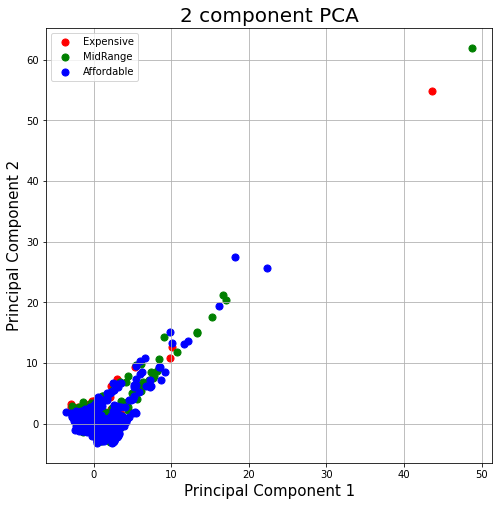

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Expensive', 'MidRange', 'Affordable']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['PriceBand'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.25230806, 0.23678396])

Text(0.5, 1.0, 'GPS')

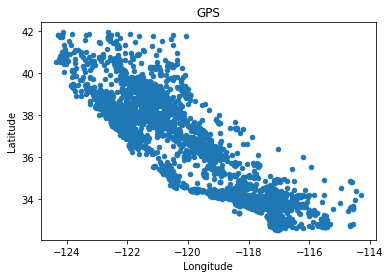

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude")
plt.title("GPS")

In [ ]:
df['PriceBand'] = pd.qcut(df['MedHouseVal'],3, labels = ['MidRange', 'Affordable', 'Expensive'])
df['PriceBand'].value_counts().sort_index()

MidRange      5516
Affordable    5497
Expensive     5499
Name: PriceBand, dtype: int64

<AxesSubplot:>

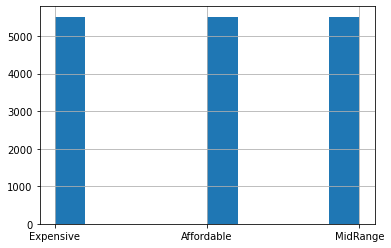

In [ ]:
df['PriceBand'].hist()

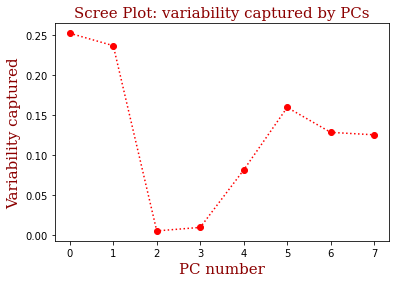

In [ ]:
contrib=eigvalues/(np.sum(eigvalues)) # the variability captured by each Principal Component
#print(contrib)
#Plot 1: The variability captured by principal components (scree plot)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plot1=plt.figure(1)
plt.plot(contrib,'o:r')
plt.title("Scree Plot: variability captured by PCs",fontdict=font2)
plt.xlabel("PC number",fontdict=font2)
plt.ylabel("Variability captured",fontdict=font2)
# plt.grid()
plt.show()

(16512, 8)
(16512, 8)


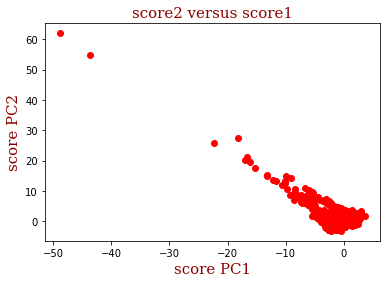

In [ ]:
normalized_x = normalized_df.iloc[:,0:8] # the normalized data matrix
print(np.shape(normalized_x))
scoremat=normalized_x@eigvectors # the scores
print(np.shape(scoremat))
plot1=plt.figure(2)
plt.plot(scoremat[0],scoremat[1],'or')
plt.title("score2 versus score1",fontdict=font2)
plt.xlabel("score PC1",fontdict=font2)
plt.ylabel("score PC2",fontdict=font2)
plt.show()

[ 0.36770311  0.93071666 -1.12703525 ...  0.92619066  0.00225479
 -0.71316924]


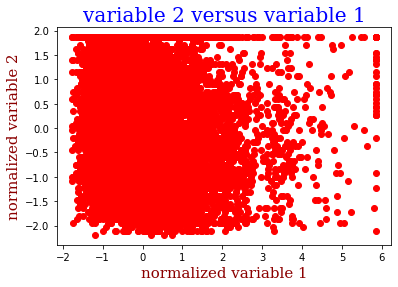

In [ ]:
tempdata=np.array(normalized_x)
print(tempdata[:,0])
plot3=plt.figure(3)
plt.plot(tempdata[:,0],tempdata[:,1],'or')
plt.title("variable 2 versus variable 1",fontdict=font1)
plt.xlabel("normalized variable 1",fontdict=font2)
plt.ylabel("normalized variable 2",fontdict=font2)
# plt.grid()
plt.show()

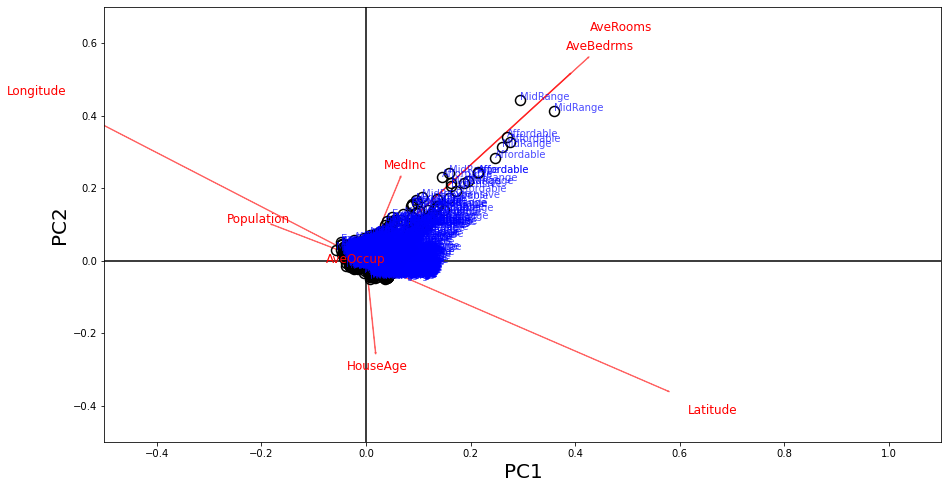

In [ ]:
def biplot(scorei, coeffi, pcx_col, pcy_col, labels=None):
    
    coeff = coeffi.copy()
    score = scorei.copy()
    
    pcx_col-=1
    pcy_col-=1
    xs = score[:,pcx_col]
    ys = score[:,pcy_col]
    
    # Convention: In each eigenvector, the entry with larges magnitude should be positive  
    coeff[:,pcx_col], xs = (-coeff[:,pcx_col], -xs) if coeff[np.argmax(abs(coeff[:,pcx_col]), axis=0), pcx_col] < 0 else (coeff[:,pcx_col], xs)
    coeff[:,pcy_col], ys = (-coeff[:,pcy_col], -ys) if coeff[np.argmax(abs(coeff[:,pcy_col]), axis=0), pcy_col] < 0 else (coeff[:,pcy_col], ys)

    n = coeff.shape[0]
    # Convention: Divide these scores by the magnitude of the largest magnitude score
    scale = 1.0/abs(score[:,[pcx_col,pcy_col]]).max()

    plt.subplots(figsize=(15,8))

    xs_data = xs * scale
    ys_data = ys * scale
    plt.plot(xs_data, ys_data, linestyle = "None", marker = "o", markeredgewidth=1.5, markersize=10, markerfacecolor = "None", color = "black")
    # plt.scatter(xs_data, ys_data , s=25)

    # If you want to hide the country names then comment the next 2 lines related to for loop
    for j, txt in enumerate(list(df['PriceBand'])):
        plt.annotate(txt, (xs_data[j], ys_data[j]), color='blue', alpha=0.7)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,pcx_col], coeff[i,pcy_col],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,pcx_col]* 1.15, coeff[i,pcy_col] * 1.15, "Var"+str(i+1), size=12, color = 'red', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,pcx_col]* 1.15, coeff[i,pcy_col] * 1.15, labels[i], size=12, color = 'red', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(pcx_col+1), fontsize=20)
    plt.ylabel("PC{}".format(pcy_col+1), fontsize=20)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlim(-0.5,1.1)
    plt.ylim(-0.5,0.7)
    # plt.grid()

biplot(scorei=scoremat.values, coeffi=eigvectors, pcx_col=1, pcy_col=2, labels=list(cov_mat.columns)) # pcx_col = PC1, pcy_col = PC2
plt.show()

In [ ]:
x_normalized = np.asanyarray(normalized_x)

pc_col = [0,1]
x_hat_df = scoremat.iloc[:,pc_col] @ eigvectors[:,pc_col].T
x_hat = np.asanyarray(x_hat_df)
x_hat.shape

(16512, 8)

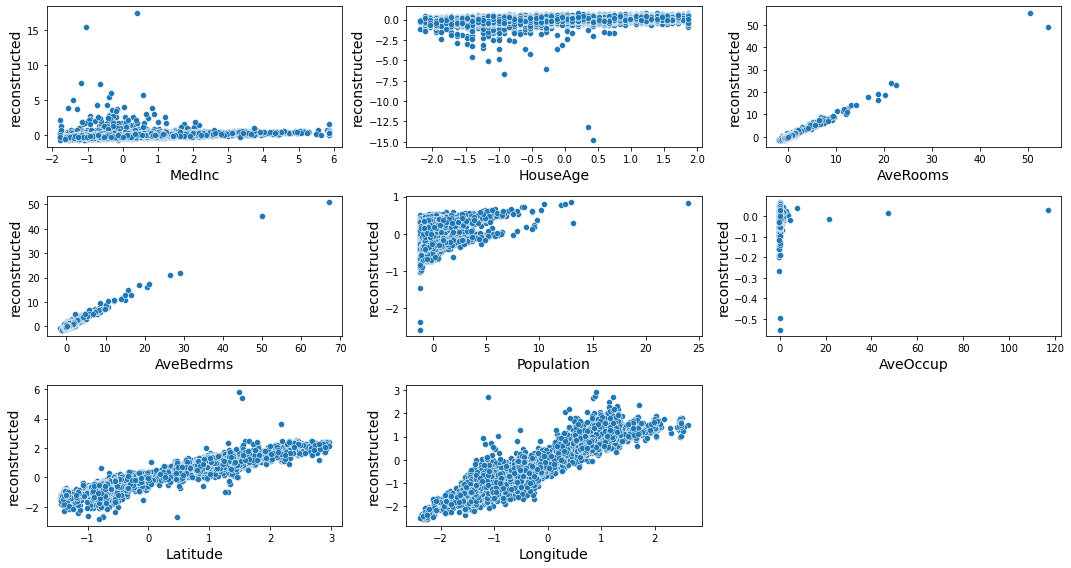

In [ ]:
labels = list(normalized_x.columns)

plt.subplots(figsize=(15,8))
for i in range(1,eigvectors.shape[1]+1):
    plt.subplot(3,3,i)
    sns.scatterplot(x=x_normalized[:,i-1], y=x_hat[:,i-1])
    plt.xlabel(labels[i-1], fontsize=14)
    plt.ylabel('reconstructed', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
print('************************PCA SUMMARY************************')
print("Number of features : ",pca.n_features_)
print("Number of samples : ", pca.n_samples_ )
print("Number of PC components : ",pca.n_components_)
print("Percentage of variance explained : ",pca.explained_variance_ratio_)
print('***********************************************************')

************************PCA SUMMARY************************
Number of features :  8
Number of samples :  16512
Number of PC components :  2
Percentage of variance explained :  [0.25230806 0.23678396]
***********************************************************


# Linear Discriminant Analysis

Accuracy : 0.6793823796548593
[[545 293 246]
 [264 766  51]
 [161  44 933]]


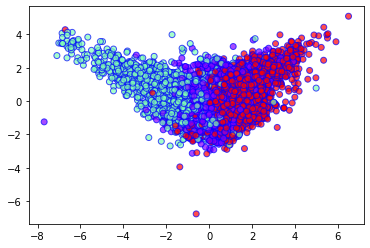

In [ ]:
# make a prediction with a lda model on the dataset
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df2.iloc[:, 0:8].values
y = df.iloc[:, 9].values
  
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
  
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
  
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
  
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

In [ ]:
df_tr=pd.read_csv("C:\\housing_classes_test.csv")
df_tr['PriceBand'] = pd.qcut(df_tr['MedHouseVal'],3, labels = ['MidRange', 'Affordable', 'Expensive'])
df_tr['PriceBand'].value_counts().sort_index()

MidRange      1377
Affordable    1377
Expensive     1374
Name: PriceBand, dtype: int64

Accuracy : 0.6818044202240388
[[628 199 255]
 [317 761  28]
 [230  22 863]]


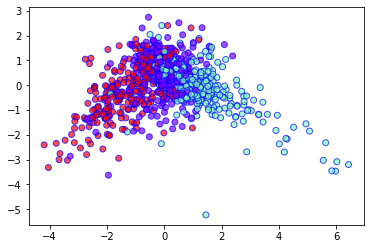

In [ ]:
X_tr = df_tr.iloc[:,0:8 ].values
y_tr = df_tr.iloc[:, 9].values
X_tr = sc.fit_transform(X_tr)
le = LabelEncoder()
y_tr = le.fit_transform(y_tr)
X_tr_train, X_tr_test, y_tr_train, y_tr_test = train_test_split(X_tr, y_tr, test_size=0.8)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_tr_train = lda.fit_transform(X_tr_train, y_tr_train)
X_tr_test = lda.transform(X_tr_test)
  
# plot the scatterplot
plt.scatter(X_tr_train[:,0],X_tr_train[:,1],c=y_tr_train,cmap='rainbow', alpha=0.7,edgecolors='b')
  # X_train[:,0],X_train[:,1],c=y_tr_train,cmap='rainbow',
  #alpha=0.7,edgecolors='b'


# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_tr_train, y_tr_train)
y_tr_pred = classifier.predict(X_tr_test)
  
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_tr_test, y_tr_pred)))
conf_m = confusion_matrix(y_tr_test, y_tr_pred)
print(conf_m)

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd',random_state=21,tol=0.000000001,early_stopping=True, verbose=True)

In [ ]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 1.09942604
Validation score: 0.423729
Iteration 2, loss = 1.05103003
Validation score: 0.548830
Iteration 3, loss = 1.01209580
Validation score: 0.577885
Iteration 4, loss = 0.97397257
Validation score: 0.583535
Iteration 5, loss = 0.93551447
Validation score: 0.589185
Iteration 6, loss = 0.89859386
Validation score: 0.598063
Iteration 7, loss = 0.86564007
Validation score: 0.600484
Iteration 8, loss = 0.83752513
Validation score: 0.610977
Iteration 9, loss = 0.81430771
Validation score: 0.616626
Iteration 10, loss = 0.79521667
Validation score: 0.632768
Iteration 11, loss = 0.77932457
Validation score: 0.633575
Iteration 12, loss = 0.76567098
Validation score: 0.635190
Iteration 13, loss = 0.75336016
Validation score: 0.633575
Iteration 14, loss = 0.74225307
Validation score: 0.639225
Iteration 15, loss = 0.73195545
Validation score: 0.648910
Iteration 16, loss = 0.72244470
Validation score: 0.658596
Iteration 17, loss = 0.71332399
Validation score: 0.659403
Iterat

In [ ]:
accuracy_score(y_test, y_pred)

0.7274709302325582

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 903,  234,  257],
       [ 310, 1009,   31],
       [ 274,   19, 1091]], dtype=int64)

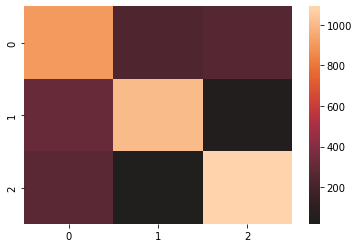

In [ ]:
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_tr,y_tr, test_size= 0.25, random_state=27)
clf_te = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd',random_state=21,tol=0.000000001,early_stopping=True, verbose=True)

In [ ]:
clf_te.fit(x_train1, y_train1)
y_pred_te = clf_te.predict(x_test1)

Iteration 1, loss = 1.12448136
Validation score: 0.322581
Iteration 2, loss = 1.10980882
Validation score: 0.351613
Iteration 3, loss = 1.09417781
Validation score: 0.393548
Iteration 4, loss = 1.08037505
Validation score: 0.438710
Iteration 5, loss = 1.06773408
Validation score: 0.474194
Iteration 6, loss = 1.05659409
Validation score: 0.500000
Iteration 7, loss = 1.04598811
Validation score: 0.525806
Iteration 8, loss = 1.03560955
Validation score: 0.564516
Iteration 9, loss = 1.02565816
Validation score: 0.580645
Iteration 10, loss = 1.01564959
Validation score: 0.609677
Iteration 11, loss = 1.00573901
Validation score: 0.619355
Iteration 12, loss = 0.99556536
Validation score: 0.632258
Iteration 13, loss = 0.98555316
Validation score: 0.638710
Iteration 14, loss = 0.97524068
Validation score: 0.645161
Iteration 15, loss = 0.96503447
Validation score: 0.645161
Iteration 16, loss = 0.95489992
Validation score: 0.638710
Iteration 17, loss = 0.94439985
Validation score: 0.641935
Iterat

In [ ]:
accuracy_score(y_test1, y_pred_te)

0.7248062015503876

In [ ]:
cm1 = confusion_matrix(y_test1, y_pred_te)
cm1

array([[208,  42,  76],
       [ 83, 264,  12],
       [ 63,   8, 276]], dtype=int64)

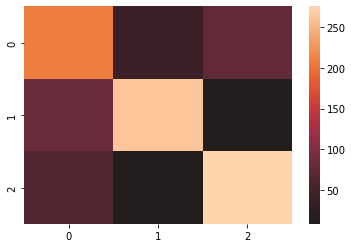

In [ ]:
sns.heatmap(cm1, center=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, labels = np.unique(y_train)))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1394
           1       0.80      0.75      0.77      1350
           2       0.79      0.79      0.79      1384

    accuracy                           0.73      4128
   macro avg       0.73      0.73      0.73      4128
weighted avg       0.73      0.73      0.73      4128



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred_te, labels = np.unique(y_train1)))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       326
           1       0.84      0.74      0.78       359
           2       0.76      0.80      0.78       347

    accuracy                           0.72      1032
   macro avg       0.73      0.72      0.72      1032
weighted avg       0.73      0.72      0.73      1032



# Heatmap of Prices

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['Latitude', 'Longitude']]
data = [[row['Latitude'],row['Longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

# Conclusion
The MLP Classifier has a better accuracy when compared to the LDA Classifier (72% vs 68%). This could be attributed to the fact that for MLP, there are multiple iterations for the epochs after which the best accuracy is brought forth.